In [1]:
#importation of libraries
import numpy as np #used for data manipulation
import pandas as pd #used for data manipulation
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 5)
plt.rcParams['hatch.linewidth'] = 2.0 


import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
#creating a variable to read the csv file 
df=pd.read_csv(r"C:\Users\HP 2022\Downloads\flights.csv")
airlines=pd.read_csv(r"C:\Users\HP 2022\Downloads\airlines.csv")
airports=pd.read_csv(r"C:\Users\HP 2022\Downloads\airports.csv")
pd.set_option('display.max_columns', None) #displayed all the columns
df.head(15)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
df.shape, airports.shape, airlines.shape

((1048575, 31), (322, 7), (14, 2))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [7]:
print(df.isnull().sum()) #checking for the sum of null values 

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64


In [8]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [9]:
# examing the missing value
missing_df = df.isnull().sum(axis=0).reset_index() # Calculate the number of NaN values in each column
missing_df.columns = ['variable', 'missing values'] # Rename the columns of the resulting DataFrame
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100 # Calculate the percentage of missing values in each column
missing_df.sort_values('filling factor (%)').reset_index(drop = True) # Sort the resulting DataFrame by the percentage of missing values in descending order

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,1008048,3.864960
1,LATE_AIRCRAFT_DELAY,820047,21.794149
2,AIRLINE_DELAY,820047,21.794149
3,SECURITY_DELAY,820047,21.794149
4,AIR_SYSTEM_DELAY,820047,21.794149
5,WEATHER_DELAY,820047,21.794149
6,ELAPSED_TIME,43071,95.892425
7,AIR_TIME,43071,95.892425
8,ARRIVAL_DELAY,43071,95.892425
9,WHEELS_ON,41296,96.061703


In [10]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE'],
      dtype='object')

In [11]:
df1=df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
        'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
        'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
        'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','DATE','CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   YEAR                 1048575 non-null  int64         
 1   MONTH                1048575 non-null  int64         
 2   DAY                  1048575 non-null  int64         
 3   DAY_OF_WEEK          1048575 non-null  int64         
 4   AIRLINE              1048575 non-null  object        
 5   FLIGHT_NUMBER        1048575 non-null  int64         
 6   TAIL_NUMBER          1040825 non-null  object        
 7   ORIGIN_AIRPORT       1048575 non-null  object        
 8   DESTINATION_AIRPORT  1048575 non-null  object        
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64         
 10  DEPARTURE_TIME       1009060 non-null  float64       
 11  DEPARTURE_DELAY      1009060 non-null  float64       
 12  TAXI_OUT             1008346 non-null  float64       
 1

In [13]:
 df=df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
        'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
        'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
        'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','DATE']]

In [14]:
# df['TAIL_NUMBER'].fillna(df['TAIL_NUMBER'].mode()[0], inplace=True)
# df['DEPARTURE_TIME'].fillna(df['DEPARTURE_TIME'].median(), inplace=True)
# df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].median(), inplace=True)
# df['TAXI_OUT'].fillna(df['TAXI_OUT'].median(), inplace=True)
# df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].median(), inplace=True)
# df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].median(), inplace=True)
# df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].median(), inplace=True)
# df['AIR_TIME'].fillna(df['AIR_TIME'].median(), inplace=True)
# df['WHEELS_ON'].fillna(df['WHEELS_ON'].median(), inplace=True)
# df['TAXI_IN'].fillna(df['TAXI_IN'].median(), inplace=True)
# df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].median(), inplace=True)
df1['ARRIVAL_DELAY'].fillna(df1['ARRIVAL_DELAY'].median(), inplace=True)
df1['CANCELLATION_REASON'].fillna(df1['CANCELLATION_REASON'].mode()[0], inplace=True)
# df['AIR_SYSTEM_DELAY'].fillna(df['AIR_SYSTEM_DELAY'].median(), inplace=True)
# df['SECURITY_DELAY'].fillna(df['SECURITY_DELAY'].median(), inplace=True)
# df['AIRLINE_DELAY'].fillna(df['AIRLINE_DELAY'].median(), inplace=True)
# df['LATE_AIRCRAFT_DELAY'].fillna(df['LATE_AIRCRAFT_DELAY'].median(), inplace=True)
# df['WEATHER_DELAY'].fillna(df['WEATHER_DELAY'].median(), inplace=True)




In [15]:
# remove missing values
df.dropna(inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005504 entries, 0 to 1048573
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   YEAR                 1005504 non-null  int64         
 1   MONTH                1005504 non-null  int64         
 2   DAY                  1005504 non-null  int64         
 3   DAY_OF_WEEK          1005504 non-null  int64         
 4   AIRLINE              1005504 non-null  object        
 5   FLIGHT_NUMBER        1005504 non-null  int64         
 6   TAIL_NUMBER          1005504 non-null  object        
 7   ORIGIN_AIRPORT       1005504 non-null  object        
 8   DESTINATION_AIRPORT  1005504 non-null  object        
 9   SCHEDULED_DEPARTURE  1005504 non-null  int64         
 10  DEPARTURE_TIME       1005504 non-null  float64       
 11  DEPARTURE_DELAY      1005504 non-null  float64       
 12  TAXI_OUT             1005504 non-null  float64       
 1

In [17]:
df.describe(include='object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
count,1005504,1005504,1005504,1005504
unique,14,4518,315,315
top,WN,N477HA,ATL,ATL
freq,214483,809,65017,65157


In [18]:
df.describe(exclude='object')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
count,1005504.0,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1005504.0,1005504.0,1005504
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-09 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16710
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-10 00:00:00
mean,2015.0,1.685546e+00,1.384900e+01,3.966488e+00,2.243120e+03,1.322630e+03,1.333695e+03,1.123649e+01,1.664477e+01,1.357440e+03,1.405624e+02,1.369381e+02,1.127477e+02,8.069146e+02,1.485989e+03,7.545650e+00,1.505140e+03,1.492300e+03,7.612191e+00,0.0,0.0,NaN
std,0.0,7.040508e-01,8.669462e+00,1.988990e+00,1.800354e+03,4.700038e+02,4.826088e+02,3.894948e+01,1.005360e+01,4.829521e+02,7.478493e+01,7.394818e+01,7.186952e+01,5.956539e+02,5.031511e+02,6.335567e+00,4.855638e+02,5.068820e+02,4.209367e+01,0.0,0.0,NaN
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,2.000000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.0,0.0,NaN
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.460000e+02,9.230000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.690000e+02,1.110000e+03,4.000000e+00,1.121000e+03,1.115000e+03,-1.200000e+01,0.0,0.0,NaN


In [19]:
df.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6517
TAIL_NUMBER            4518
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1235
DEPARTURE_TIME         1433
DEPARTURE_DELAY         857
TAXI_OUT                179
WHEELS_OFF             1433
SCHEDULED_TIME          460
ELAPSED_TIME            685
AIR_TIME                650
DISTANCE               1266
WHEELS_ON              1440
TAXI_IN                 178
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  1
CANCELLED                 1
DATE                     69
dtype: int64

In [20]:
# convert the format
def format_hours(tick):
    if pd.isnull(tick):
        return np.nan
    else:
        if tick == 2400: tick = 0
        tick = "{0:04d}".format(int(tick))
        hours = datetime.time(int(tick[0:2]), int(tick[2:4]))
        return hours
def combine_date_hours(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_hours(cols))
        else:
            cols[1] = format_hours(cols[1])
            liste.append(combine_date_hours(cols))
    return pd.Series(liste)

In [21]:
# # modify variables
# df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
# df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_hours)
# df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_hours)
# df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_hours)
# #__________________________________________________________________________
# df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
#              'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

In [22]:
df.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6517
TAIL_NUMBER            4518
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1235
DEPARTURE_TIME         1433
DEPARTURE_DELAY         857
TAXI_OUT                179
WHEELS_OFF             1433
SCHEDULED_TIME          460
ELAPSED_TIME            685
AIR_TIME                650
DISTANCE               1266
WHEELS_ON              1440
TAXI_IN                 178
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  1
CANCELLED                 1
DATE                     69
dtype: int64

| Column                | Description                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| **YEAR**              | The year of the flight.                                                                         |
| **MONTH**             | The month of the flight.                                                                        |
| **DAY**               | The day of the month of the flight.                                                             |
| **DAY_OF_WEEK**       | The day of the week of the flight (1 for Monday, 2 for Tuesday, etc.).                           |
| **AIRLINE**           | The code for the airline operating the flight.                                                   |
| **FLIGHT_NUMBER**     | The flight number.                                                                               |
| **TAIL_NUMBER**       | The unique identifier for the aircraft.                                                          |
| **ORIGIN_AIRPORT**    | The code for the origin airport.                                                                 |
| **DESTINATION_AIRPORT** | The code for the destination airport.                                                           |
| **SCHEDULED_DEPARTURE** | The scheduled departure time of the flight (local time).                                        |
| **DEPARTURE_TIME**   | The actual departure time of the flight (local time).                                            |
| **DEPARTURE_DELAY**  | The delay in departure (in minutes).                                                             |
| **TAXI_OUT**         | The time duration between departure from the gate and wheels off.                                |
| **WHEELS_OFF**       | The time when the aircraft's wheels leave the ground.                                            |
| **SCHEDULED_TIME**   | The scheduled duration of the flight.                                                            |
| **ELAPSED_TIME**     | The total elapsed time of the flight (actual time from wheels-off to wheels-on).                 |
| **AIR_TIME**         | The time duration the flight spent in the air.                                                   |
| **DISTANCE**         | The distance traveled by the flight.                                                             |
| **WHEELS_ON**        | The time when the aircraft's wheels touch the ground.                                            |
| **TAXI_IN**          | The time duration between wheels-on and arrival at the gate.                                      |
| **SCHEDULED_ARRIVAL** | The scheduled arrival time of the flight (local time).                                           |
| **ARRIVAL_TIME**     | The actual arrival time of the flight (local time).                                              |
| **ARRIVAL_DELAY**    | The delay in arrival (in minutes).                                                               |
| **DIVERTED**         | Indicates whether the flight was diverted (1 if diverted, 0 otherwise).                           |
| **CANCELLED**        | Indicates whether the flight was cancelled (1 if cancelled, 0 otherwise).                         |
| **CANCELLATION_REASON** | The reason for flight cancellation (e.g., A = carrier, B = weather, C = NAS, D = security).    |
| **AIR_SYSTEM_DELAY** | Delay due to air system issues (in minutes).                                                     |
| **SECURITY_DELAY**   | Delay due to security issues (in minutes).                                                        |
| **AIRLINE_DELAY**    | Delay due to the airline (in minutes).                                                           |
| **LATE_AIRCRAFT_DELAY** | Delay due to late arrival of the aircraft (in minutes).                                           |
| **WEATHER_DELAY**    | Delay due to weather conditions (in minutes).                                                     |


In [23]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2015,3,10,2,DL,1546,N555NW,PHX,ATL,1013,1045.0,32.0,15.0,1100.0,217.0,204.0,183.0,1587,1703.0,6.0,1650,1709.0,19.0,0,0,2015-03-10
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,1005.0,-8.0,17.0,1022.0,96.0,88.0,64.0,416,1126.0,7.0,1149,1133.0,-16.0,0,0,2015-03-10
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,1005.0,-8.0,40.0,1045.0,264.0,270.0,219.0,1416,1324.0,11.0,1337,1335.0,-2.0,0,0,2015-03-10
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,1010.0,-3.0,21.0,1031.0,251.0,257.0,220.0,1723,1611.0,16.0,1624,1627.0,3.0,0,0,2015-03-10


In [24]:
airports.shape

(322, 7)

In [25]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [26]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [27]:
missing_airports = airports.isnull().sum(axis=0).reset_index() # Calculate the number of NaN values in each column
missing_airports.columns = ['variable', 'missing values'] # Rename the columns of the resulting DataFrame
missing_airports['filling factor (%)']=(airports.shape[0]-missing_airports['missing values'])/airports.shape[0]*100 # Calculate the percentage of missing values in each column
missing_airports.sort_values('filling factor (%)').reset_index(drop = True) # Sort the resulting DataFrame by the percentage of missing values in descending order

,variable,missing values,filling factor (%)
0,LATITUDE,3,99.068323
1,LONGITUDE,3,99.068323
2,IATA_CODE,0,100.000000
3,AIRPORT,0,100.000000
4,CITY,0,100.000000
5,STATE,0,100.000000
6,COUNTRY,0,100.000000


In [28]:
airports = airports.dropna(subset = ['LATITUDE','LONGITUDE'])

In [29]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [30]:
airports.shape

(319, 7)

In [31]:
# Merging on AIRLINE and IATA_CODE
df = df.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
df = df.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df = df.rename(columns={"AIRLINE_y":"AIRLINE"})

In [32]:
df = df.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
# df = df.drop(['AIRPORT_x','IATA_CODE'], axis=1)
# df = df.rename(columns={"AIRPORT_y":"ORIGIN_AIRPORT"})


In [33]:
 df = df.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')
# df = df.drop(['AIRPORT_x','IATA_CODE'], axis=1)
# df = df.rename(columns={"AIRPORT_y":"DESTINATION_AIRPORT"})

In [34]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [35]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE,AIRLINE,IATA_CODE_x,AIRPORT_x,CITY_x,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE_y,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


# PREDICTION OF FLIGHT DELAY

In [36]:
# Set the seed for reproducibility
np.random.seed(42)

# Randomly sample 15,000 entries
df = df.sample(n=15000, random_state=42)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 222925 to 150223
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 15000 non-null  int64         
 1   MONTH                15000 non-null  int64         
 2   DAY                  15000 non-null  int64         
 3   DAY_OF_WEEK          15000 non-null  int64         
 4   FLIGHT_NUMBER        15000 non-null  int64         
 5   TAIL_NUMBER          15000 non-null  object        
 6   ORIGIN_AIRPORT       15000 non-null  object        
 7   DESTINATION_AIRPORT  15000 non-null  object        
 8   SCHEDULED_DEPARTURE  15000 non-null  int64         
 9   DEPARTURE_TIME       15000 non-null  float64       
 10  DEPARTURE_DELAY      15000 non-null  float64       
 11  TAXI_OUT             15000 non-null  float64       
 12  WHEELS_OFF           15000 non-null  float64       
 13  SCHEDULED_TIME       1500

In [38]:
Flight_data_delay =[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0) 

In [39]:
df['DELAY'] = Flight_data_delay

In [40]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y', 'DELAY'],
      dtype='object')

In [42]:
df_pred = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DELAY']]

In [43]:
df_pred.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY
222925,2015,3,1,7,404,IAH,SFO,1535,1556.0,21.0,22.0,1618.0,260.0,249.0,223.0,1635,1801.0,4.0,1755,1805.0,0
911916,2015,3,9,1,3166,DFW,PIA,2040,2105.0,25.0,22.0,2127.0,110.0,108.0,82.0,672,2249.0,4.0,2230,2253.0,1
710757,2015,1,19,1,1633,BTV,JFK,1104,1054.0,-10.0,10.0,1104.0,78.0,79.0,59.0,266,1203.0,10.0,1222,1213.0,0
102560,2015,2,20,5,1763,RSW,ORD,1355,1620.0,145.0,12.0,1632.0,190.0,175.0,156.0,1120,1808.0,7.0,1605,1815.0,1
864558,2015,1,18,7,723,ATL,BUF,1025,1023.0,-2.0,12.0,1035.0,121.0,109.0,93.0,712,1208.0,4.0,1226,1212.0,0


In [44]:
df_pred.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.342447,-0.044761,-0.003815,0.000772,0.001796,0.023377,0.007887,-0.000610,0.002510,0.006867,0.004345,0.004741,-0.007279,0.017569,-0.007933,-0.007274,0.038490
DAY,NaN,-0.342447,1.000000,0.035200,0.009002,0.006260,-0.002381,-0.072330,-0.006426,-0.000604,-0.000286,-0.007457,-0.004369,-0.001559,0.008151,-0.026122,0.013002,0.007992,-0.097319
DAY_OF_WEEK,NaN,-0.044761,0.035200,1.000000,0.026727,0.024469,0.022630,-0.000897,-0.018208,0.020485,0.021515,0.016870,0.021454,0.022955,0.000557,-0.016854,0.006959,0.001302,-0.018271
FLIGHT_NUMBER,NaN,-0.003815,0.009002,0.026727,1.000000,0.004911,0.010327,0.000785,0.031095,0.015585,-0.321963,-0.311763,-0.325677,-0.340251,-0.010535,0.006217,-0.019760,-0.003372,0.032195
SCHEDULED_DEPARTURE,NaN,0.000772,0.006260,0.024469,0.004911,1.000000,0.972202,0.100214,-0.084742,0.951974,-0.020022,-0.025016,-0.009817,-0.002023,0.710710,-0.044283,0.776416,0.685094,0.120491
DEPARTURE_TIME,NaN,0.001796,-0.002381,0.022630,0.010327,0.972202,1.000000,0.174657,-0.075781,0.979264,-0.019543,-0.023994,-0.010601,-0.004351,0.727248,-0.037943,0.775006,0.700639,0.180759
DEPARTURE_DELAY,NaN,0.023377,-0.072330,-0.000897,0.000785,0.100214,0.174657,1.000000,0.077255,0.172507,0.043634,0.047429,0.035753,0.042110,0.076938,0.024410,0.085464,0.067459,0.579570
TAXI_OUT,NaN,0.007887,-0.006426,-0.018208,0.031095,-0.084742,-0.075781,0.077255,1.000000,-0.046058,0.106654,0.215157,0.081523,0.066376,-0.061222,0.000922,-0.067203,-0.059566,0.287274
WHEELS_OFF,NaN,-0.000610,-0.000604,0.020485,0.015585,0.951974,0.979264,0.172507,-0.046058,1.000000,-0.022644,-0.024164,-0.014997,-0.011364,0.741129,-0.037220,0.778951,0.714414,0.185808


<AxesSubplot: >

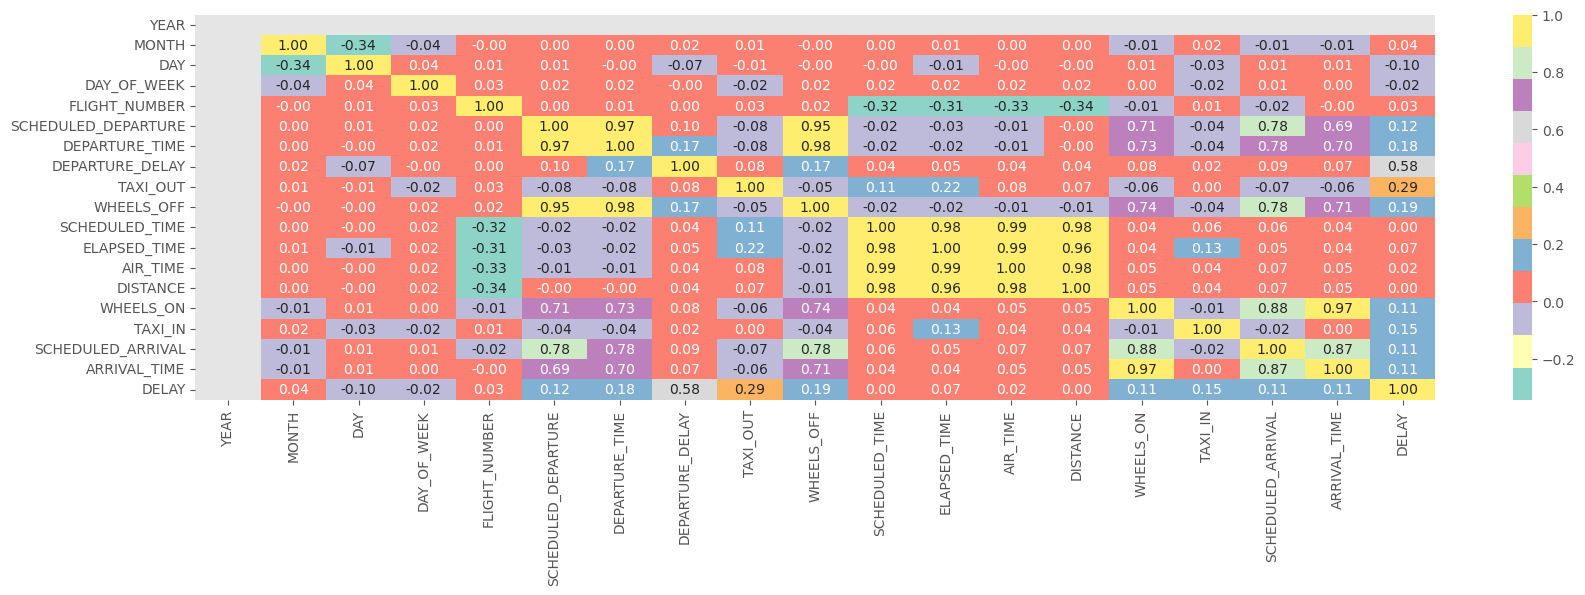

In [45]:
sns.heatmap(data=df_pred.corr(),annot=True, fmt='.2f',cmap='Set3')

###### Insights:
- Considering the correlation values, the variables that seem most promising for predicting DELAY are:
    
    * DEPARTURE_DELAY (0.579570)
    * TAXI_OUT (0.287274)
    * DEPARTURE_TIME (0.180759)
    * WHEELS_OFF (0.185808)
    * SCHEDULED_DEPARTURE (0.120491)
    * WHEELS_ON (0.108498)
    * SCHEDULED_ARRIVAL (0.111968)
    * TAXI_IN (0.146711)

These features are the most strongly correlated with the DELAY column and are likely to be the most important for predicting delays in machine learning model.

In [46]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 222925 to 150223
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 15000 non-null  int64  
 1   MONTH                15000 non-null  int64  
 2   DAY                  15000 non-null  int64  
 3   DAY_OF_WEEK          15000 non-null  int64  
 4   FLIGHT_NUMBER        15000 non-null  int64  
 5   ORIGIN_AIRPORT       15000 non-null  object 
 6   DESTINATION_AIRPORT  15000 non-null  object 
 7   SCHEDULED_DEPARTURE  15000 non-null  int64  
 8   DEPARTURE_TIME       15000 non-null  float64
 9   DEPARTURE_DELAY      15000 non-null  float64
 10  TAXI_OUT             15000 non-null  float64
 11  WHEELS_OFF           15000 non-null  float64
 12  SCHEDULED_TIME       15000 non-null  float64
 13  ELAPSED_TIME         15000 non-null  float64
 14  AIR_TIME             15000 non-null  float64
 15  DISTANCE             15000 non

In [47]:
print(df[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].dtypes)

ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
dtype: object


In [48]:
#print(df['ORIGIN_AIRPORT'].unique())
print(df['DESTINATION_AIRPORT'].unique())

['SFO' 'PIA' 'JFK' 'ORD' 'BUF' 'MSN' 'LAS' 'DEN' 'JAX' 'JAC' 'MCO' 'CLT'
 'FWA' 'LGA' 'SJC' 'ATL' 'DCA' 'ANC' 'MCI' 'LAX' 'FLL' 'DAY' 'TUS' 'KOA'
 'STL' 'BJI' 'BNA' 'IAD' 'SMF' 'BWI' 'PHX' 'BTV' 'DTW' 'CAK' 'DFW' 'ELP'
 'SAN' 'PVD' 'RDU' 'PHL' 'MDW' 'SEA' 'KTN' 'OAK' 'BUR' 'IAH' 'LIT' 'SNA'
 'BOS' 'GSO' 'JNU' 'EWR' 'CRP' 'HOU' 'CHS' 'MIA' 'ACY' 'SLC' 'SJU' 'FAY'
 'OMA' 'PBI' 'PSP' 'SAT' 'DSM' 'RSW' 'CPR' 'RNO' 'TUL' 'CLE' 'BIS' 'SYR'
 'TWF' 'MSP' 'PWM' 'DAL' 'ALB' 'TPA' 'IND' 'ABE' 'ABQ' 'FNT' 'COS' 'MEM'
 'MSY' 'FLG' 'OGG' 'AUS' 'CHA' 'PDX' 'FAR' 'GRB' 'BDL' 'CVG' 'CMH' 'ISP'
 'FAT' 'CID' 'PIT' 'MFR' 'XNA' 'HNL' 'TTN' 'MLU' 'PSC' 'CAE' 'PSG' 'LFT'
 'ONT' 'OKC' 'LRD' 'BRO' 'BHM' 'LNK' 'LEX' 'LAN' 'FCA' 'GNV' 'MAF' 'CMI'
 'RST' 'MKG' 'ROC' 'SBN' 'EUG' 'MHT' 'LGB' 'CSG' 'SHV' 'AZO' 'RIC' 'GRR'
 'BTR' 'MKE' 'MTJ' 'MRY' 'SBP' 'ATW' 'CLD' 'TYS' 'RAP' 'ITO' 'HSV' 'FSD'
 'SIT' 'ICT' 'BOI' 'BQN' 'BMI' 'GSP' 'PNS' 'HIB' 'RDM' 'ORH' 'HPN' 'LIH'
 'SGF' 'CHO' 'LSE' 'BZN' 'SAF' 'ISN' 'AVP' 'HRL' 'T

In [ ]:
dffg.columns

In [ ]:
#identify the key predictor features in the dataset
from sklearn.ensemble import RandomForestClassifier

feat_model = RandomForestClassifier()

#fits model
feat_model.fit(df_scaled,y)
feature_names = list(df_scaled.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)),importance[indices],color='green', align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("relative importance")
plt.show()



In [49]:
df_p = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','SCHEDULED_DEPARTURE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF','WHEELS_ON','TAXI_IN', 'SCHEDULED_ARRIVAL']]

In [50]:
df_p.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL
222925,3,1,7,404,1535,IAH,SFO,1556.0,21.0,22.0,1618.0,1801.0,4.0,1755
911916,3,9,1,3166,2040,DFW,PIA,2105.0,25.0,22.0,2127.0,2249.0,4.0,2230
710757,1,19,1,1633,1104,BTV,JFK,1054.0,-10.0,10.0,1104.0,1203.0,10.0,1222
102560,2,20,5,1763,1355,RSW,ORD,1620.0,145.0,12.0,1632.0,1808.0,7.0,1605
864558,1,18,7,723,1025,ATL,BUF,1023.0,-2.0,12.0,1035.0,1208.0,4.0,1226


In [51]:
y = df['DELAY']

In [52]:
df_p=pd.get_dummies(df_p,columns=['ORIGIN_AIRPORT'])
df_p=pd.get_dummies(df_p,columns=['DESTINATION_AIRPORT'])

In [53]:
df_p.head(2)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT_ABE,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,ORIGIN_AIRPORT_ACT,ORIGIN_AIRPORT_ACV,ORIGIN_AIRPORT_ACY,ORIGIN_AIRPORT_ADQ,ORIGIN_AIRPORT_AEX,ORIGIN_AIRPORT_AGS,ORIGIN_AIRPORT_ALB,ORIGIN_AIRPORT_ALO,ORIGIN_AIRPORT_AMA,ORIGIN_AIRPORT_ANC,ORIGIN_AIRPORT_APN,ORIGIN_AIRPORT_ASE,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ATW,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_AVL,ORIGIN_AIRPORT_AVP,ORIGIN_AIRPORT_AZO,ORIGIN_AIRPORT_BDL,ORIGIN_AIRPORT_BET,ORIGIN_AIRPORT_BFL,ORIGIN_AIRPORT_BHM,ORIGIN_AIRPORT_BIL,ORIGIN_AIRPORT_BIS,ORIGIN_AIRPORT_BJI,ORIGIN_AIRPORT_BLI,ORIGIN_AIRPORT_BMI,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOI,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BPT,ORIGIN_AIRPORT_BQN,ORIGIN_AIRPORT_BRD,ORIGIN_AIRPORT_BRO,ORIGIN_AIRPORT_BTM,ORIGIN_AIRPORT_BTR,ORIGIN_AIRPORT_BTV,ORIGIN_AIRPORT_BUF,ORIGIN_AIRPORT_BUR,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_BZN,ORIGIN_AIRPORT_CAE,ORIGIN_AIRPORT_CAK,ORIGIN_AIRPORT_CDC,ORIGIN_AIRPORT_CDV,ORIGIN_AIRPORT_CEC,ORIGIN_AIRPORT_CHA,ORIGIN_AIRPORT_CHO,ORIGIN_AIRPORT_CHS,ORIGIN_AIRPORT_CID,ORIGIN_AIRPORT_CIU,ORIGIN_AIRPORT_CLD,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_CMH,ORIGIN_AIRPORT_CMI,ORIGIN_AIRPORT_CMX,ORIGIN_AIRPORT_CNY,ORIGIN_AIRPORT_COD,ORIGIN_AIRPORT_COS,ORIGIN_AIRPORT_COU,ORIGIN_AIRPORT_CPR,ORIGIN_AIRPORT_CRP,ORIGIN_AIRPORT_CRW,ORIGIN_AIRPORT_CSG,ORIGIN_AIRPORT_CVG,ORIGIN_AIRPORT_CWA,ORIGIN_AIRPORT_DAB,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DAY,ORIGIN_AIRPORT_DBQ,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DHN,ORIGIN_AIRPORT_DIK,ORIGIN_AIRPORT_DLH,ORIGIN_AIRPORT_DRO,ORIGIN_AIRPORT_DSM,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_EAU,ORIGIN_AIRPORT_EGE,ORIGIN_AIRPORT_EKO,ORIGIN_AIRPORT_ELM,ORIGIN_AIRPORT_ELP,ORIGIN_AIRPORT_ERI,ORIGIN_AIRPORT_ESC,ORIGIN_AIRPORT_EUG,ORIGIN_AIRPORT_EVV,ORIGIN_AIRPORT_EWN,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_EYW,ORIGIN_AIRPORT_FAI,ORIGIN_AIRPORT_FAR,ORIGIN_AIRPORT_FAT,ORIGIN_AIRPORT_FAY,ORIGIN_AIRPORT_FCA,ORIGIN_AIRPORT_FLG,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_FNT,ORIGIN_AIRPORT_FSD,ORIGIN_AIRPORT_FSM,ORIGIN_AIRPORT_FWA,ORIGIN_AIRPORT_GCC,ORIGIN_AIRPORT_GCK,ORIGIN_AIRPORT_GEG,ORIGIN_AIRPORT_GFK,ORIGIN_AIRPORT_GGG,ORIGIN_AIRPORT_GJT,ORIGIN_AIRPORT_GNV,ORIGIN_AIRPORT_GPT,ORIGIN_AIRPORT_GRB,ORIGIN_AIRPORT_GRI,ORIGIN_AIRPORT_GRK,ORIGIN_AIRPORT_GRR,ORIGIN_AIRPORT_GSO,ORIGIN_AIRPORT_GSP,ORIGIN_AIRPORT_GTF,ORIGIN_AIRPORT_GTR,ORIGIN_AIRPORT_GUC,ORIGIN_AIRPORT_GUM,ORIGIN_AIRPORT_HDN,ORIGIN_AIRPORT_HLN,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOB,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_HPN,ORIGIN_AIRPORT_HRL,ORIGIN_AIRPORT_HSV,ORIGIN_AIRPORT_HYS,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAG,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_ICT,ORIGIN_AIRPORT_IDA,ORIGIN_AIRPORT_ILG,ORIGIN_AIRPORT_ILM,ORIGIN_AIRPORT_IMT,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_INL,ORIGIN_AIRPORT_ISN,ORIGIN_AIRPORT_ISP,ORIGIN_AIRPORT_ITO,ORIGIN_AIRPORT_JAC,ORIGIN_AIRPORT_JAN,ORIGIN_AIRPORT_JAX,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_JLN,ORIGIN_AIRPORT_JMS,ORIGIN_AIRPORT_JNU,ORIGIN_AIRPORT_KOA,ORIGIN_AIRPORT_KTN,ORIGIN_AIRPORT_LAN,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAW,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LBB,ORIGIN_AIRPORT_LBE,ORIGIN_AIRPORT_LCH,ORIGIN_AIRPORT_LEX,ORIGIN_AIRPORT_LFT,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_LGB,ORIGIN_AIRPORT_LIH,ORIGIN_AIRPORT_LIT,ORIGIN_AIRPORT_LNK,ORIGIN_AIRPORT_LRD,ORIGIN_AIRPORT_LSE,ORIGIN_AIRPORT_MAF,ORIGIN_AIRPORT_MBS,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDT,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MEI,ORIGIN_AIRPORT_MEM,ORIGIN_AIRPORT_MFE,ORIGIN_AIRPORT_MFR,ORIGIN_AIRPORT_MGM,ORIGIN_AIRPORT_MHK,ORIGIN_AIRPORT_MHT,ORIGIN_AIRPORT_MIA,ORIGIN_AIRPORT_MKE,ORIGIN_AIRPORT_MKG,ORIGIN_AIRPORT_MLB,ORIGIN_AIRPORT_MLI,ORIGIN_AIRPORT_MLU,ORIGIN_AIRPORT_MOB,ORIGIN_AIRPORT_MOT,ORIGIN_AIRPORT_MQT,ORIGIN_AIRPORT_MRY,ORIGIN_AIRPORT_MSN,ORIGIN_AIRPORT_MSO,ORIGIN_AIRPORT_MSP,ORIGIN_AIRPORT_MSY,ORIGIN_AIRPORT_MTJ,ORIGIN_AIRPORT_MYR

In [54]:
x=df_p

In [55]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [56]:
# Create an instance of the StandardScaler
sc = StandardScaler(with_mean=False)

In [57]:
x=sc.fit_transform(x)

In [58]:
x

array([[4.26393117, 0.11523701, 3.49680119, ..., 0.        , 0.        ,
        0.        ],
       [4.26393117, 1.03713307, 0.49954303, ..., 0.        , 0.        ,
        0.        ],
       [1.42131039, 2.18950315, 0.49954303, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.42131039, 1.84379213, 2.49771514, ..., 0.        , 0.        ,
        0.        ],
       [1.42131039, 2.30474016, 0.99908606, ..., 0.        , 0.        ,
        0.        ],
       [1.42131039, 0.92189606, 1.99817211, ..., 0.        , 0.        ,
        0.        ]])

In [74]:
delay_count = df.groupby(by=['DELAY'])['DELAY'].count()
print(delay_count)

DELAY
0    11738
1     3262
Name: DELAY, dtype: int64


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier()

In [65]:
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
#test the model
pred=rf.predict(x_test)

In [67]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((4500, 606), (10500, 606), (4500,), (10500,))

In [69]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [71]:
print(accuracy)

0.9357777777777778


In [72]:
print(conmat)

[[3430   82]
 [ 207  781]]


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3512
           1       0.90      0.79      0.84       988

    accuracy                           0.94      4500
   macro avg       0.92      0.88      0.90      4500
weighted avg       0.93      0.94      0.93      4500



In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb_clf = GradientBoostingClassifier()

In [78]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
gb_pred = gb_clf.predict(x_test)

In [80]:
#importing evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
#defining a function that uses the scikit-learn library to generate a confusion matrix based on the model's predictions.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='coolwarm_r')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [82]:
print("classification report for the gradient boosting model \n",classification_report(y_test,gb_pred))

classification report for the gradient boosting model 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3512
           1       0.89      0.82      0.86       988

    accuracy                           0.94      4500
   macro avg       0.92      0.90      0.91      4500
weighted avg       0.94      0.94      0.94      4500



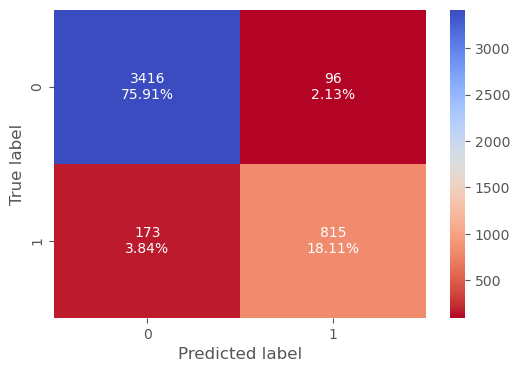

In [83]:
confusion_matrix_sklearn(gb_clf,x_test,y_test)

In [84]:
accuracy=accuracy_score(y_test,gb_pred)

In [85]:
print(accuracy)

0.9402222222222222
